<a href="https://colab.research.google.com/github/athenexfolk/water-quality-classification/blob/master/Water_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from google.colab import drive
# drive.mount('/content/drive')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

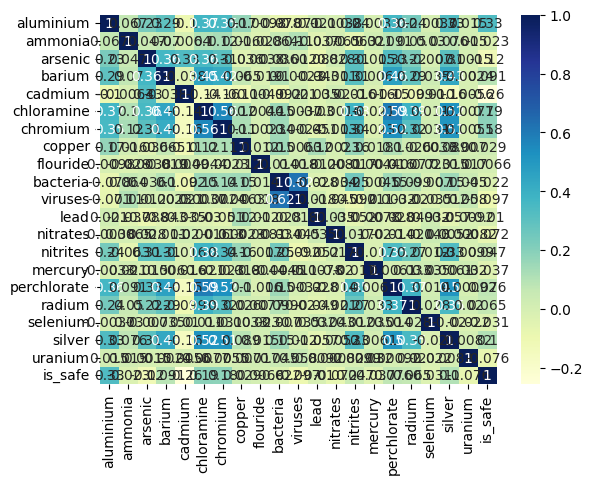

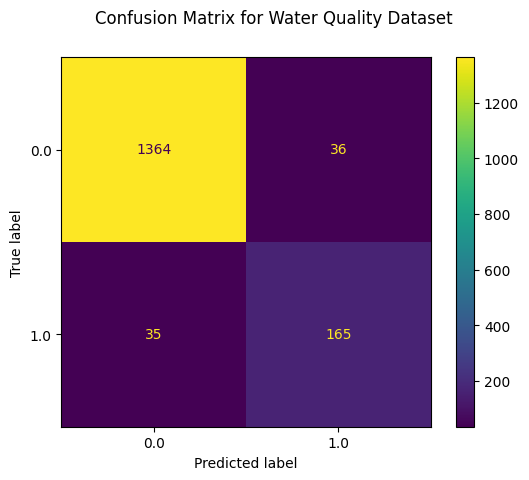

True Positive(TP)  =  165
False Positive(FP) =  36
True Negative(TN)  =  1364
False Negative(FN) =  35
Accuracy of the decision tree classifier = 0.956


In [3]:

# read csv file
df = pd.read_csv("https://raw.githubusercontent.com/athenexfolk/water-quality-classification/master/waterQuality.csv")

# check few data
df.head()

# check info
df.info()

# check null
df.isnull().sum()

# check duplicate
df.duplicated().sum()

# modify some missing value
df['ammonia'] = df['ammonia'].replace('#NUM!', np.nan)
df['ammonia'] = df['ammonia'].astype('float')
df['is_safe'] = df['is_safe'].replace('#NUM!', np.nan)
df['is_safe'] = df['is_safe'].astype('float')

corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

# fill 0 into NaN (from missing value with #NUM!)
df['ammonia'] = df['ammonia'].fillna(0)
df['is_safe'] = df['is_safe'].fillna(0)

# train and test split
X = df.drop(['is_safe'], axis=1)
y = df['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# make prediction on the testing data
predictions = dt.predict(X_test)

# display confusion matrix
cm = confusion_matrix(y_test, predictions)
fig = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
fig.figure_.suptitle("Confusion Matrix for Water Quality Dataset")
plt.show()

# calculate accuracy score
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the decision tree classifier = {:0.3f}'.format(accuracy))
